In [26]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import dill

In [12]:
#  Load Dataset
df = pd.read_csv("student_scores.csv")

In [3]:
df.head()

,study_hours,attendance,score
0,1.0,60,20
1,2.0,65,25
2,3.0,70,30
3,4.0,75,40
4,5.0,80,50


In [13]:
# Fill missing values if any (example: fill with mean)
df.fillna(df.mean(), inplace=True)

In [14]:
#  Dataset Overview
df.describe()

,study_hours,attendance,score
count,37.00000,37.000000,37.000000
mean,6.22973,80.513514,56.027027
std,3.72416,16.419199,27.532291
min,0.00000,50.000000,10.000000
25%,3.00000,67.000000,30.000000
50%,6.00000,82.000000,60.000000
75%,9.00000,96.000000,80.000000
max,13.00000,100.000000,98.000000


In [15]:
# Feature and target selection
X = df[['study_hours', 'attendance']]
y = df['score']

In [16]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Select and train Random Forest Regressor (initial model)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Initial Model MAE: {mae:.2f}")
print(f"Initial Model R²: {r2:.2f}")

Initial Model MAE: 2.98
Initial Model R²: 0.99


In [27]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [28]:
# Predict with best data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [29]:
# Evaluate Fine-Tuned Model
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Fine-tuned MAE: {mae_best:.2f}")
print(f"Fine-tuned R²: {r2_best:.2f}")


Fine-tuned MAE: 2.98
Fine-tuned R²: 0.99


In [30]:
# Compare Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_best})
comparison_df.head()

,Actual,Predicted
0,55,54.36
1,22,18.44
2,50,46.56
3,28,24.66
4,78,74.00


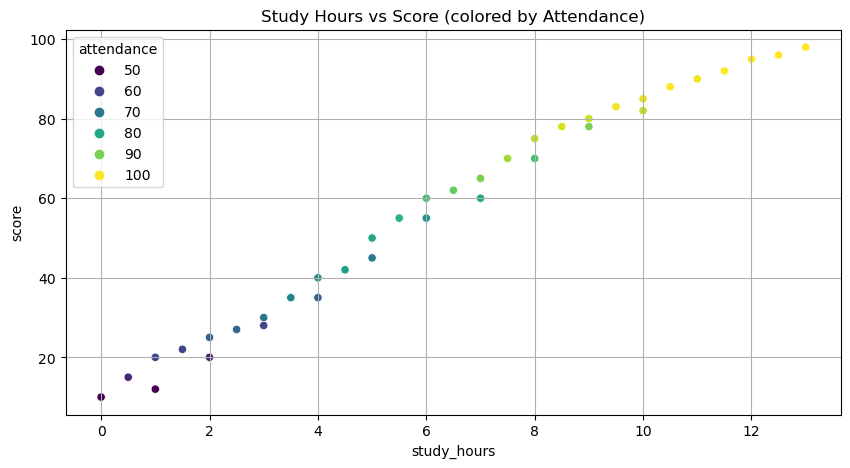

In [6]:
#  Visualize the Data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="study_hours", y="score", hue="attendance", palette="viridis")
plt.title("Study Hours vs Score (colored by Attendance)")
plt.grid(True)
plt.show()

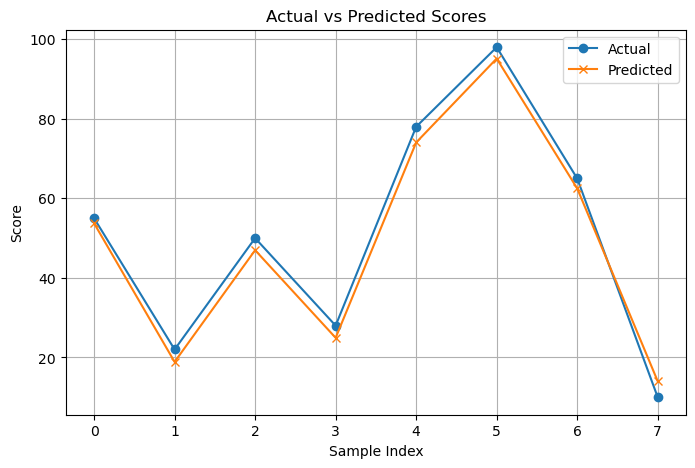

In [10]:
#  Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.legend()
plt.title("Actual vs Predicted Scores")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()


In [11]:
#  Save the Trained Model
with open("model.dill", "wb") as f:
    dill.dump(model, f)

print("✅ Model saved to model.dill")


✅ Model saved to model.dill
